In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
news_df = pd.read_csv('data/training/in/news/archive/raw_partner_headlines.csv')

In [3]:
news_df.drop(columns=['Unnamed: 0'], inplace=True)
news_df.rename(columns={'headline': 'Headline', 'url': 'URL', 'publisher': 'Publisher', 'date': 'Date', 'stock': 'Ticker'}, inplace=True)
news_df

,Headline,URL,Publisher,Date,Ticker
0,Agilent Technologies Announces Pricing of $5……...,http://www.gurufocus.com/news/1153187/agilent-...,GuruFocus,2020-06-01 00:00:00,A
1,Agilent (A) Gears Up for Q2 Earnings: What's i...,http://www.zacks.com/stock/news/931205/agilent...,Zacks,2020-05-18 00:00:00,A
2,J.P. Morgan Asset Management Announces Liquida...,http://www.gurufocus.com/news/1138923/jp-morga...,GuruFocus,2020-05-15 00:00:00,A
3,"Pershing Square Capital Management, L.P. Buys ...",http://www.gurufocus.com/news/1138704/pershing...,GuruFocus,2020-05-15 00:00:00,A
4,Agilent Awards Trilogy Sciences with a Golden ...,http://www.gurufocus.com/news/1134012/agilent-...,GuruFocus,2020-05-12 00:00:00,A
...,...,...,...,...,...
1845554,Consumer Cyclical Sector Wrap,https://www.benzinga.com/content/12/08/2846030...,webmaster,2012-08-20 00:00:00,ZX
1845555,Consumer Cyclical Sector Wrap,https://www.benzinga.com/content/12/07/2767124...,webmaster,2012-07-23 00:00:00,ZX
1845556,Zacks #5 Rank Additions for Monday - Tale of t...,http://www.zacks.com/stock/news/73497/here-are...,Zacks,2012-04-23 00:00:00,ZX
1845557,4 Stock Strategies From Wall Street: Feb. 9 (U...,http://www.thestreet.com/story/11409053/1/4-st...,TheStreet.Com,2012-02-09 00:00:00,ZX


In [7]:
news_df.describe()

,Headline,URL,Publisher,Date,Ticker
count,1845559,1845559,1845559,1845559,1845559
unique,806998,889995,21,3731,6552
top,Midday Gainers / Losers,https://seekingalpha.com/article/4268012-summe...,Seeking Alpha,2015-11-19 00:00:00,KR
freq,4009,343,897219,3600,3314


In [4]:
news_tickers = news_df['Ticker'].unique()

In [6]:
news_tickers.shape

(6552,)

In [307]:
news_df['Date'].max()

'2020-06-04 00:00:00'

In [8]:
price_df = pd.read_csv('data/training/in/price/World-Stock-Prices-Dataset.csv')

In [9]:
price_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
count,292731.000000,292731.000000,292731.000000,292731.000000,2.927310e+05,292731.000000,292731.000000,2.0
mean,70.446286,71.245174,69.627808,70.455215,2.322016e+07,0.003568,0.000926,0.0
std,135.931276,137.388289,134.380320,135.909365,8.762947e+07,0.069639,0.118814,0.0
min,0.196890,0.199922,0.192798,0.198861,0.000000e+00,0.000000,0.000000,0.0
25%,15.421985,15.638967,15.207284,15.424648,1.358700e+06,0.000000,0.000000,0.0
50%,33.691266,34.063354,33.293835,33.694252,4.603700e+06,0.000000,0.000000,0.0
75%,76.961395,77.743997,76.205922,76.989998,1.224450e+07,0.000000,0.000000,0.0
max,3445.580078,3463.070068,3370.000000,3427.610107,7.421641e+09,15.000000,50.000000,0.0


In [310]:
filtered_price_df = price_df[price_df['Ticker'].isin(news_tickers)]
filtered_price_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains
1,2024-07-18 00:00:00-04:00,201.929993,202.220001,199.539993,199.850006,292900.0,0.0,0.0,toyota,TM,automotive,japan,NaN
3,2024-07-18 00:00:00-04:00,250.800003,253.729996,247.759995,249.199997,4047100.0,0.0,0.0,american express,AXP,finance,usa,NaN
5,2024-07-18 00:00:00-04:00,272.290009,273.619995,268.559998,269.149994,5547300.0,0.0,0.0,visa,V,finance,usa,NaN
6,2024-07-18 00:00:00-04:00,564.179993,564.260010,556.070007,556.849976,2183500.0,0.0,0.0,adobe,ADBE,technology,usa,NaN
8,2024-07-18 00:00:00-04:00,58.549999,58.619999,57.990002,58.040001,2182700.0,0.0,0.0,unilever,UL,consumer goods,netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292724,2000-01-03 00:00:00-05:00,0.794800,0.852586,0.770643,0.848323,535796800.0,0.0,0.0,apple,AAPL,technology,usa,NaN
292725,2000-01-03 00:00:00-05:00,13.822670,13.822670,13.675379,13.720699,48000.0,0.0,0.0,honda,HMC,automotive,japan,NaN
292728,2000-01-03 00:00:00-05:00,38.147537,38.255972,35.935457,37.496925,53076000.0,0.0,0.0,cisco,CSCO,technology,usa,NaN
292729,2000-01-03 00:00:00-05:00,25.215814,25.330655,24.690826,24.772856,2173400.0,0.0,0.0,3m,MMM,manufacturing,usa,NaN


In [311]:
filtered_price_df['Date'] = pd.to_datetime(filtered_price_df['Date'], utc=True).dt.date
news_df['Date'] = pd.to_datetime(news_df['Date'], utc=True).dt.date

/var/folders/mg/lr7m2p2119xbdqz4v6d7j8cc0000gn/T/ipykernel_21030/3735056647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_price_df['Date'] = pd.to_datetime(filtered_price_df['Date'], utc=True).dt.date


In [312]:
filtered_price_df = filtered_price_df.sort_values(by=['Date'], ascending=False).reset_index(drop=True)
filtered_price_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains
0,2024-07-18,201.929993,202.220001,199.539993,199.850006,292900.0,0.0,0.0,toyota,TM,automotive,japan,NaN
1,2024-07-18,193.000000,197.440002,192.070007,193.339996,1563400.0,0.0,0.0,hershey company,HSY,food & beverage,usa,NaN
2,2024-07-18,133.720001,135.520004,130.080002,131.550003,1188000.0,0.0,0.0,crocs,CROX,footwear,usa,NaN
3,2024-07-18,27.980000,28.559999,27.330000,27.410000,8291600.0,0.0,0.0,southwest airlines,LUV,aviation,usa,NaN
4,2024-07-18,230.279999,230.440002,222.270004,224.179993,65964400.0,0.0,0.0,apple,AAPL,technology,usa,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191469,2000-01-03,2.647906,2.659888,2.611962,2.632930,76000.0,0.0,0.0,logitech,LOGI,technology,switzerland,NaN
191470,2000-01-03,22.631671,23.163612,22.244805,23.115253,8402230.0,0.0,0.0,the walt disney company,DIS,entertainment,usa,NaN
191471,2000-01-03,19.481210,19.515179,18.903737,19.158504,3320000.0,0.0,0.0,philips,PHG,technology,netherlands,NaN
191472,2000-01-03,15.207880,15.207880,14.486817,14.781797,10997000.0,0.0,0.0,the coca-cola company,KO,food & beverage,usa,NaN


In [313]:
merged_df = filtered_price_df.merge(news_df, on=['Date', 'Ticker'])
merged_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains,Headline,URL,Publisher
0,2020-06-04,121.949997,124.500000,121.849998,123.690002,14195100.0,0.0,0.0,the walt disney company,DIS,entertainment,usa,NaN,How The Government Can Help Build Economic Moats,https://talkmarkets.com/content/how-the-govern...,TalkMarkets
1,2020-06-04,108.931142,109.697355,106.687899,107.131012,6895800.0,0.0,0.0,procter & gamble,PG,consumer goods,usa,NaN,P&G to Webcast Presentation From the Deutsche ...,http://www.gurufocus.com/news/1155446/pg-to-we...,GuruFocus
2,2020-06-04,231.265405,233.487592,229.135801,230.506149,4759400.0,0.0,0.0,the home depot,HD,retail,usa,NaN,"The Morgan Wallen ""Chasin' You"" Stock Market (...",https://talkmarkets.com/content/the-morgan-wal...,TalkMarkets
3,2020-06-04,191.627505,192.096856,188.831022,189.339478,7829800.0,0.0,0.0,visa,V,finance,usa,NaN,Visa Inc (V) VICE CHAIR & CFO Vasant M Prabhu ...,http://www.gurufocus.com/news/1155853/visa-inc...,GuruFocus
4,2020-06-03,34.323872,36.163876,34.157491,35.645149,26644900.0,0.0,0.0,southwest airlines,LUV,aviation,usa,NaN,Southwest Airlines Announces Pricing Of Notes,http://www.gurufocus.com/news/1155133/southwes...,GuruFocus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24250,2010-02-23,23.434521,24.206137,23.368003,24.073099,6205500.0,0.0,0.0,nordstrom,JWN,retail,usa,NaN,A Retail ETF for Earnings Season,https://www.benzinga.com/content/thestreet-com...,webmaster
24251,2010-02-23,23.434521,24.206137,23.368003,24.073099,6205500.0,0.0,0.0,nordstrom,JWN,retail,usa,NaN,Retail ETF for This Week's Earnings,https://www.benzinga.com/content/thestreet-com...,webmaster
24252,2010-02-16,9.912996,10.030419,9.814113,10.011879,1724700.0,0.0,0.0,american eagle outfitters,AEO,apparel,usa,NaN,Abercrombie Continues to Make a Splash Overseas,https://www.benzinga.com/content/thestreet-com...,webmaster
24253,2010-02-12,9.789388,9.882090,9.702866,9.845010,3029400.0,0.0,0.0,american eagle outfitters,AEO,apparel,usa,NaN,ANF Preview: Targeting International Growth,https://www.benzinga.com/content/thestreet-com...,webmaster


In [314]:
single_news_all_df = merged_df[['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume', 'Industry_Tag', 'Headline', 'Publisher']]

In [315]:
single_news_all_df

,Date,Ticker,Open,High,Low,Close,Volume,Industry_Tag,Headline,Publisher
0,2020-06-04,DIS,121.949997,124.500000,121.849998,123.690002,14195100.0,entertainment,How The Government Can Help Build Economic Moats,TalkMarkets
1,2020-06-04,PG,108.931142,109.697355,106.687899,107.131012,6895800.0,consumer goods,P&G to Webcast Presentation From the Deutsche ...,GuruFocus
2,2020-06-04,HD,231.265405,233.487592,229.135801,230.506149,4759400.0,retail,"The Morgan Wallen ""Chasin' You"" Stock Market (...",TalkMarkets
3,2020-06-04,V,191.627505,192.096856,188.831022,189.339478,7829800.0,finance,Visa Inc (V) VICE CHAIR & CFO Vasant M Prabhu ...,GuruFocus
4,2020-06-03,LUV,34.323872,36.163876,34.157491,35.645149,26644900.0,aviation,Southwest Airlines Announces Pricing Of Notes,GuruFocus
...,...,...,...,...,...,...,...,...,...,...
24250,2010-02-23,JWN,23.434521,24.206137,23.368003,24.073099,6205500.0,retail,A Retail ETF for Earnings Season,webmaster
24251,2010-02-23,JWN,23.434521,24.206137,23.368003,24.073099,6205500.0,retail,Retail ETF for This Week's Earnings,webmaster
24252,2010-02-16,AEO,9.912996,10.030419,9.814113,10.011879,1724700.0,apparel,Abercrombie Continues to Make a Splash Overseas,webmaster
24253,2010-02-12,AEO,9.789388,9.882090,9.702866,9.845010,3029400.0,apparel,ANF Preview: Targeting International Growth,webmaster


In [316]:
# Sort the news_df by date in descending order
news_df_sorted = single_news_all_df.sort_values(by=['Date'], ascending=False)

# Group the sorted news_df by date and ticker, and get the latest news for each group
latest_news_df = news_df_sorted.groupby(['Date', 'Ticker']).first().reset_index()

# Group the sorted news_df by date and ticker, and concatenate all the news strings into a single string
concatenated_news_df = news_df_sorted.groupby(['Date', 'Ticker'])['Headline'].apply(lambda x: ' - '.join(x)).reset_index()

# Merge the latest_news_df and concatenated_news_df on date and ticker
merged_df = latest_news_df.merge(concatenated_news_df, on=['Date', 'Ticker'])

# Rename the columns
merged_df.rename(columns={'Headline_x': 'Latest_News', 'Headline_y': 'Concatenated_News'}, inplace=True)

# Display the merged_df
final_df = merged_df[['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume', 'Latest_News', 'Concatenated_News']]

In [317]:
final_df

,Date,Ticker,Open,High,Low,Close,Volume,Latest_News,Concatenated_News
0,2010-02-12,AEO,9.789388,9.882090,9.702866,9.845010,3029400.0,ANF Preview: Targeting International Growth,ANF Preview: Targeting International Growth
1,2010-02-12,JWN,22.170667,22.849155,22.144059,22.749378,2623000.0,WFMI Preview: Focus Will Be on Expenses,WFMI Preview: Focus Will Be on Expenses
2,2010-02-16,AEO,9.912996,10.030419,9.814113,10.011879,1724700.0,Abercrombie Continues to Make a Splash Overseas,Abercrombie Continues to Make a Splash Overseas
3,2010-02-23,JWN,23.434521,24.206137,23.368003,24.073099,6205500.0,Dave's Daily: Consumer Confidence Hit,Dave's Daily: Consumer Confidence Hit - A Reta...
4,2010-02-24,JWN,24.206723,24.473980,24.099821,24.447254,2283600.0,The End of the Mac & Cheese Trade,The End of the Mac & Cheese Trade
...,...,...,...,...,...,...,...,...,...
10962,2020-06-03,SBUX,73.491121,74.896305,73.350609,74.549698,9956700.0,Bill Ackman's Pershing Square Takes a Bigger B...,Bill Ackman's Pershing Square Takes a Bigger B...
10963,2020-06-04,DIS,121.949997,124.500000,121.849998,123.690002,14195100.0,How The Government Can Help Build Economic Moats,How The Government Can Help Build Economic Moats
10964,2020-06-04,HD,231.265405,233.487592,229.135801,230.506149,4759400.0,"The Morgan Wallen ""Chasin' You"" Stock Market (...","The Morgan Wallen ""Chasin' You"" Stock Market (..."
10965,2020-06-04,PG,108.931142,109.697355,106.687899,107.131012,6895800.0,P&G to Webcast Presentation From the Deutsche ...,P&G to Webcast Presentation From the Deutsche ...


In [318]:
# Calculate 1-day market return
filtered_price_df['1_day_return'] = -filtered_price_df.groupby('Ticker')['Close'].pct_change(1)

# Calculate 2-day market return
filtered_price_df['2_day_return'] = -filtered_price_df.groupby('Ticker')['Close'].pct_change(2)

# Calculate 3-day market return
filtered_price_df['3_day_return'] = -filtered_price_df.groupby('Ticker')['Close'].pct_change(3)

# Calculate 4-day market return
filtered_price_df['4_day_return'] = -filtered_price_df.groupby('Ticker')['Close'].pct_change(4)

# Calculate 7-day market return
filtered_price_df['7_day_return'] = -filtered_price_df.groupby('Ticker')['Close'].pct_change(7)

# Calculate 10-day market return
filtered_price_df['10_day_return'] = -filtered_price_df.groupby('Ticker')['Close'].pct_change(10)

# Calculate 30-day market return
filtered_price_df['30_day_return'] = -filtered_price_df.groupby('Ticker')['Close'].pct_change(30)

# Merge the filtered_price_df and concatenated_news_df on date and ticker
merged_df = filtered_price_df.merge(final_df, on=['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume'])

# Display the merged_df
final_df = merged_df[['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume', 'Latest_News', 'Concatenated_News', '1_day_return', '2_day_return', '3_day_return', '4_day_return', '7_day_return', '10_day_return', '30_day_return']]

In [319]:
final_df

,Date,Ticker,Open,High,Low,Close,Volume,Latest_News,Concatenated_News,1_day_return,2_day_return,3_day_return,4_day_return,7_day_return,10_day_return,30_day_return
0,2020-06-04,DIS,121.949997,124.500000,121.849998,123.690002,14195100.0,How The Government Can Help Build Economic Moats,How The Government Can Help Build Economic Moats,0.009053,0.028206,0.001614,-0.012359,-0.056457,-0.044944,-0.042478
1,2020-06-04,PG,108.931142,109.697355,106.687899,107.131012,6895800.0,P&G to Webcast Presentation From the Deutsche ...,P&G to Webcast Presentation From the Deutsche ...,0.019268,0.025199,0.019351,0.026671,0.005485,0.027079,0.076256
2,2020-06-04,HD,231.265405,233.487592,229.135801,230.506149,4759400.0,"The Morgan Wallen ""Chasin' You"" Stock Market (...","The Morgan Wallen ""Chasin' You"" Stock Market (...",0.023342,0.030455,0.030417,0.021615,-0.031447,0.001043,0.043897
3,2020-06-04,V,191.627505,192.096856,188.831022,189.339478,7829800.0,Visa Inc (V) VICE CHAIR & CFO Vasant M Prabhu ...,Visa Inc (V) VICE CHAIR & CFO Vasant M Prabhu ...,0.029908,0.029860,0.027326,0.034118,-0.009804,0.001392,0.007432
4,2020-06-03,LUV,34.323872,36.163876,34.157491,35.645149,26644900.0,Southwest Airlines Announces Pricing Of Notes,Southwest Airlines Announces Pricing Of Notes,0.048341,0.046097,0.102735,0.041831,-0.015333,-0.003029,-0.064601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10962,2010-02-24,JWN,24.206723,24.473980,24.099821,24.447254,2283600.0,The End of the Mac & Cheese Trade,The End of the Mac & Cheese Trade,0.007863,0.009475,0.026603,0.029443,0.062036,0.065389,0.117037
10963,2010-02-23,JWN,23.434521,24.206137,23.368003,24.073099,6205500.0,Dave's Daily: Consumer Confidence Hit,Dave's Daily: Consumer Confidence Hit - A Reta...,0.015305,0.023048,0.024634,0.041500,0.059760,0.079458,0.144180
10964,2010-02-16,AEO,9.912996,10.030419,9.814113,10.011879,1724700.0,Abercrombie Continues to Make a Splash Overseas,Abercrombie Continues to Make a Splash Overseas,-0.000000,0.029940,0.038575,0.025270,0.049295,0.071633,0.143749
10965,2010-02-12,AEO,9.789388,9.882090,9.702866,9.845010,3029400.0,ANF Preview: Targeting International Growth,ANF Preview: Targeting International Growth,0.016667,0.016667,0.046108,0.054600,0.057396,0.092308,0.156226


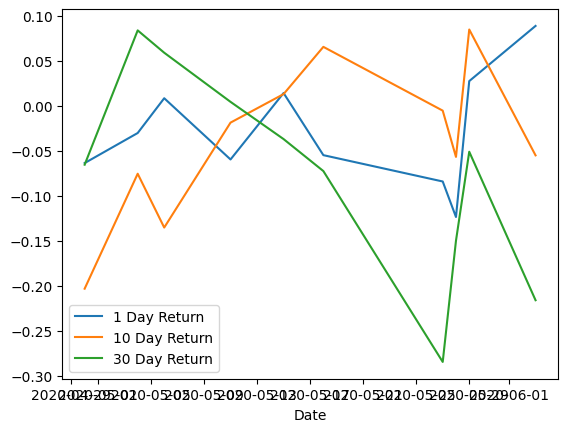

In [320]:

# Select a ticker
selected_ticker = 'JWN'

# Filter the final_df for the selected ticker
selected_ticker_df = final_df[final_df['Ticker'] == selected_ticker][:10]

# Plot the return columns
selected_ticker_df.plot(x='Date', y=['1_day_return', '10_day_return', '30_day_return'], kind='line')

# Add a legend
plt.legend(['1 Day Return', '10 Day Return', '30 Day Return'])

# Show the plot
plt.show()

In [321]:
filtered_price_df.to_csv('data/training/in/input/filtered_price.csv', index=False)
final_df.to_csv('data/training/in/input/price_news_return.csv', index=False)

In [322]:
filtered_price_df[filtered_price_df['Ticker'] == 'AAPL'][:31]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains,1_day_return,2_day_return,3_day_return,4_day_return,7_day_return,10_day_return,30_day_return
4,2024-07-18,230.279999,230.440002,222.270004,224.179993,65964400.0,0.0,0.0,apple,AAPL,technology,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,2024-07-17,229.449997,231.460007,226.639999,228.880005,57281800.0,0.0,0.0,apple,AAPL,technology,usa,NaN,-0.020965,NaN,NaN,NaN,NaN,NaN,NaN
67,2024-07-16,235.000000,236.270004,232.330002,234.820007,43176800.0,0.0,0.0,apple,AAPL,technology,usa,NaN,-0.025952,-0.047462,NaN,NaN,NaN,NaN,NaN
118,2024-07-15,236.531998,237.229996,233.089996,234.399994,58409071.0,0.0,0.0,apple,AAPL,technology,usa,NaN,0.001789,-0.024117,-0.045588,NaN,NaN,NaN,NaN
153,2024-07-12,228.919998,232.639999,228.679993,230.539993,53008200.0,0.0,0.0,apple,AAPL,technology,usa,NaN,0.016468,0.018227,-0.007253,-0.028370,NaN,NaN,NaN
183,2024-07-12,229.000000,232.639999,228.679993,230.539993,52696428.0,0.0,0.0,apple,AAPL,technology,usa,NaN,-0.000000,0.016468,0.018227,-0.007253,NaN,NaN,NaN
218,2024-07-11,231.389999,232.389999,225.770004,227.570007,64516900.0,0.0,0.0,apple,AAPL,technology,usa,NaN,0.012883,0.012883,0.029138,0.030875,NaN,NaN,NaN
237,2024-07-10,229.300003,233.080002,229.250000,232.979996,62557700.0,0.0,0.0,apple,AAPL,technology,usa,NaN,-0.023773,-0.010584,-0.010584,0.006058,-0.039254,NaN,NaN
288,2024-07-09,227.929993,229.399994,226.369995,228.679993,48076100.0,0.0,0.0,apple,AAPL,technology,usa,NaN,0.018457,-0.004878,0.008068,0.008068,0.000874,NaN,NaN
301,2024-07-08,227.089996,227.850006,223.250000,227.820007,58979000.0,0.0,0.0,apple,AAPL,technology,usa,NaN,0.003761,0.022148,-0.001099,0.011798,0.029810,NaN,NaN
